# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  


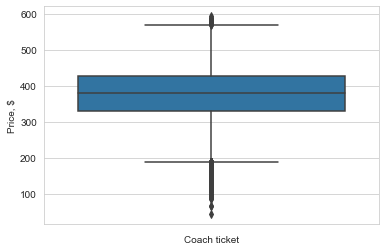

Average coach ticket price is 377$
Cheapest coach ticket is 44$
Most expensive coach ticket is 594$
500$ per ticket equals to the 98 percentile
Based on chart observation and percentile we can conclude that 500$ per ticket is significantly above average in fact only 2% of tickets are more expensive


<Figure size 432x288 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math


## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())

## Task 1
# Calculating stats
average_coach_price = np.mean(flight.coach_price)
cheapest_coach_price = np.min(flight.coach_price)
most_expensive_coach = np.max(flight.coach_price)
# Calculating percentile of the range for the given value (500$)
from scipy.stats import percentileofscore
percentile_of_500 = percentileofscore(flight.coach_price, 500)
# Ploting boxplot with mean value
sns.set_style("whitegrid")
sns.boxplot(data = flight.coach_price).set(xlabel = "Coach ticket",ylabel = "Price, $",xticklabels=[])
plt.show()
plt.clf()

print("Average coach ticket price is " + str(round(average_coach_price)) + "$")
print("Cheapest coach ticket is " + str(round(cheapest_coach_price)) + "$")
print("Most expensive coach ticket is " + str(round(most_expensive_coach)) + "$")
print("500$ per ticket equals to the " + str(round(percentile_of_500)) + " percentile")
print("Based on chart observation and percentile we can conclude that 500$ per ticket is significantly above average in fact only 2% of tickets are more expensive")


2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

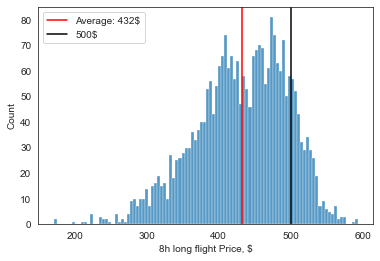

Average 8h long flight coach ticket price is 432$
Cheapest 8h long flight coach ticket is 171$
Most expensive 8h long flight coach ticket is 594$
500$ per ticket equals to the 86 percentile
500$ per ticket for the 8h long flight is more common but still above the average


<Figure size 432x288 with 0 Axes>

In [2]:
## Task 2
flight_8h = flight[(flight.hours == 8)]
average_coach_price_8h = np.mean(flight_8h.coach_price)
cheapest_coach_price_8h = np.min(flight_8h.coach_price)
most_expensive_coach_8h = np.max(flight_8h.coach_price)
# Calculating percentile of the range for the given value (500$)
from scipy.stats import percentileofscore
percentile_of_500_8h = percentileofscore(flight_8h.coach_price, 500)
# Ploting histogram of the coach prices for 8h long flights
sns.set_style("white")
sns.histplot(data = flight_8h, x="coach_price", bins = 100).set(xlabel = "8h long flight Price, $")
mean = plt.axvline(x=flight_8h.coach_price.mean(),color='red')
fivehundred = plt.axvline(x=500,color='black')
plt.legend({'Average: 432$': mean, '500$': fivehundred}, loc = 2)
plt.show()
plt.clf()

print("Average 8h long flight coach ticket price is " + str(round(average_coach_price_8h)) + "$")
print("Cheapest 8h long flight coach ticket is " + str(round(cheapest_coach_price_8h)) + "$")
print("Most expensive 8h long flight coach ticket is " + str(round(most_expensive_coach_8h)) + "$")
print("500$ per ticket equals to the " + str(round(percentile_of_500_8h)) + " percentile")
print("500$ per ticket for the 8h long flight is more common but still above the average")


3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

[   0    9   12    5   13    6   11   10    8   17   14    7    3   16
   15    4    2   18   40   20   32   31   26   21   37   27   24   29
   28   19   22   33   43   34   23   30   35   44   38   39   25   42
   45   36   47   41   46    1   50   48   51   49   54   53   58   52
 1515 1484 1498 1519 1446 1506 1473 1509 1560 1488 1512 1503 1500 1496
 1476 1536 1524 1497 1468 1532 1479 1489 1493 1495 1518 1525 1513 1522
 1494 1504 1462 1510 1492 1501 1499 1521 1508 1480 1482 1472 1491 1514
 1507 1459 1467 1528 1469 1475 1533 1477 1483 1487 1530 1481 1490]


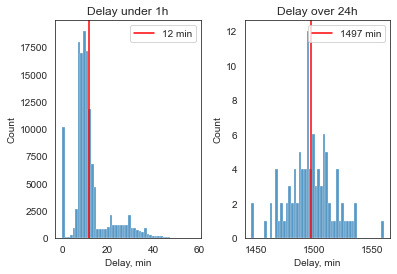

<Figure size 432x288 with 0 Axes>

In [3]:
## Task 3
# Let's find out delay unique values
print(flight.delay.unique())
# Let's breakdown delay to two subsets: under 1h and above 24h and plot histogram of each subset
# Under 1h subset
under_1h = flight[(flight.delay < 60)]
plt.subplot(1,2,1)
sns.set_style("white")
sns.histplot(data = under_1h, x="delay", bins = 50).set(xlabel = "Delay, min")
mean = plt.axvline(x=under_1h.delay.mean(),color='red')
plt.legend({'12 min': mean})
plt.title("Delay under 1h")

# Over 24h subset
over_24h = flight[(flight.delay > 1440)]
plt.subplot(1,2,2)
sns.set_style("white")
sns.histplot(data = over_24h, x="delay", bins = 50).set(xlabel = "Delay, min")
mean = plt.axvline(x=over_24h.delay.mean(),color='red')
plt.legend({'1497 min': mean})
plt.title("Delay over 24h")
# Adjust spacing between charts
plt.subplots_adjust(wspace=0.3)

plt.show()
plt.clf()

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

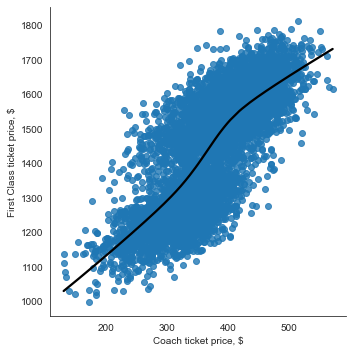

<Figure size 432x288 with 0 Axes>

In [13]:
## Task 4
# reducing dataset to random 5% 
perc = 0.05
random_flight = flight.sample(n = int(flight.shape[0]*perc))
# Let's use LOWESS (Locally Weighted Scatterplot Smoothing) smoother over our data points. 
# This will draw a line through the approximate average firstclass price for each value of coach price
sns.lmplot(x = 'coach_price', y = 'firstclass_price', data = random_flight, line_kws={'color': 'black'}, lowess=True)
plt.xlabel('Coach ticket price, $')
plt.ylabel('First Class ticket price, $')
plt.show()
plt.clf() 


5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

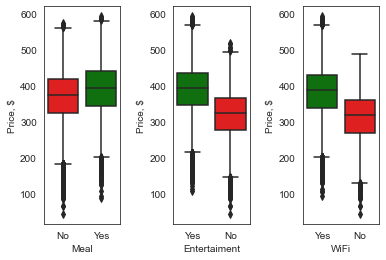

<Figure size 432x288 with 0 Axes>

In [39]:
## Task 5
my_pal = {i: "g" if i == "Yes" else "r" for i in flight.inflight_meal.unique()}
plt.subplot(1,3,1)
sns.boxplot(x='inflight_meal', y='coach_price', data=flight, palette=my_pal)
plt.xlabel("Meal")
plt.ylabel("Price, $")

plt.subplot(1,3,2)
sns.boxplot(x='inflight_entertainment', y='coach_price', data=flight, palette=my_pal)
plt.xlabel("Entertaiment")
plt.ylabel("Price, $")

plt.subplot(1,3,3)
sns.boxplot(x='inflight_wifi', y='coach_price', data=flight, palette=my_pal)
plt.xlabel("WiFi")
plt.ylabel("Price, $")

plt.subplots_adjust(wspace=0.7)

plt.show()
plt.clf()

6. How does the number of passengers change in relation to the length of flights?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


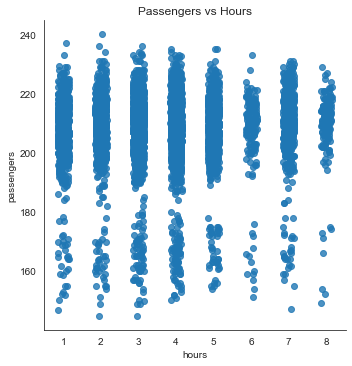

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

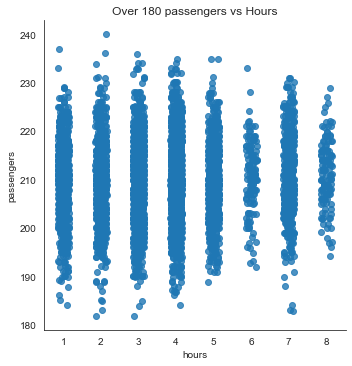

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

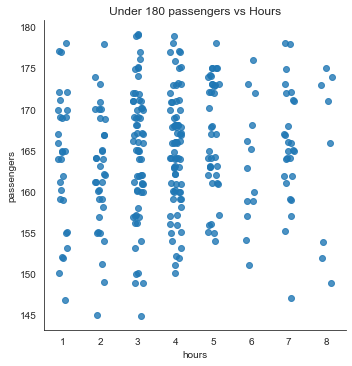

<Figure size 432x288 with 0 Axes>

In [56]:
## Task 6
sns.lmplot('hours', 'passengers', data = random_flight, x_jitter = .15, y_jitter = .15,fit_reg = False)
plt.title("Passengers vs Hours")
plt.show()
plt.clf()
# plot for flights with over 180 passengers
over_180 = random_flight[(random_flight.passengers > 180)]
sns.lmplot('hours', 'passengers', data = over_180, x_jitter = .15, y_jitter = .15, fit_reg = False)
plt.title("Over 180 passengers vs Hours")
plt.show()
plt.clf()
# plot for flights with under 180 passengers
under_180 = random_flight[(random_flight.passengers < 180)]
sns.lmplot('hours', 'passengers', data = under_180, x_jitter = .15, y_jitter = .15, fit_reg = False)
plt.title("Under 180 passengers vs Hours")
plt.show()
plt.clf()



## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

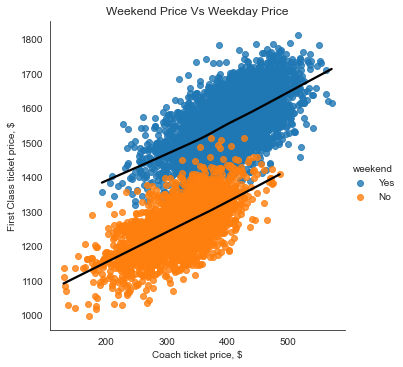

<Figure size 432x288 with 0 Axes>

In [61]:
## Task 7
sns.lmplot(x = 'coach_price', y = 'firstclass_price', data = random_flight,hue='weekend', line_kws={'color': 'black'}, lowess=True)
plt.xlabel('Coach ticket price, $')
plt.ylabel('First Class ticket price, $')
plt.title('Weekend Price Vs Weekday Price')
plt.show()
plt.clf() 


8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

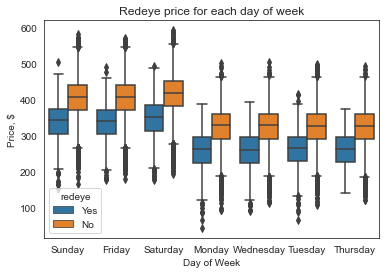

<Figure size 432x288 with 0 Axes>

In [65]:
## Task 8
sns.boxplot(x='day_of_week', y='coach_price', data=flight, hue = 'redeye')
plt.xlabel('Day of Week')
plt.ylabel('Price, $')
plt.title('Redeye price for each day of week')
plt.show()
plt.clf()